# Qustion 1

In [1]:
import numpy as np
from PIL import Image
import cv2
from skimage.feature import register_translation

### input images

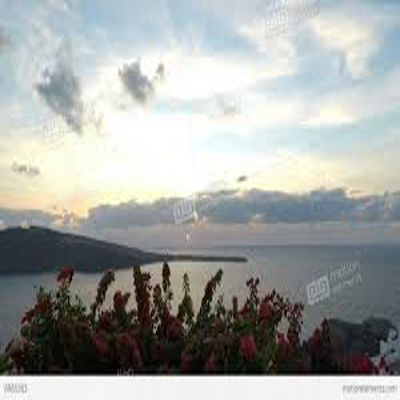

In [2]:
img1 = Image.open('images (1).jpg').resize((400,400))
display(img1)

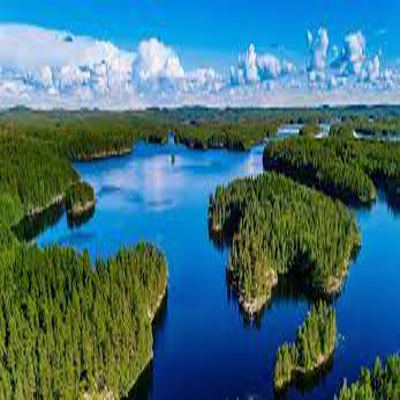

In [3]:
img2 = Image.open('msi_recruitment.png').resize((400,400))
display(img2)

### 1. sum of squared differences

In [4]:
def calculate_ssd(img1, img2):
    """Computing the sum of squared differences (SSD) between two images."""
    if img1.size != img2.size:
        print("Images don't have the same shape.")
        return
    ans = np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)
    return ans

In [5]:
calculate_ssd(img1, img2)

6080574500.0

### 2. sum of absolute differences

In [6]:
def sum_of_absolut(img1, img2): 
    """Computing the sum of absolute differences (SAD) between two images."""
    if img1.size != img2.size:
        print("Images don't have the same shape.")
        return
    # convert to RGB, then to numpy arrays and ravel into long, flat things
    a=np.array(img1.convert('RGB')).ravel()
    b=np.array(img2.convert('RGB')).ravel()

    # Calculate the sum of the absolute differences divided by number of elements
    MAE = np.sum(np.abs(np.subtract(a,b,dtype=np.float))) / a.shape[0]
    return MAE

In [7]:
sum_of_absolut(img1, img2)

<ipython-input-6-0b2b7a60a779>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  MAE = np.sum(np.abs(np.subtract(a,b,dtype=np.float))) / a.shape[0]


89.80289583333334

### 3. normalized cross-correlation

In [8]:
def ncc(img1, img2):
    """Computing the normalized cross-correlation between two images."""
    if img1.size != img2.size:
        print("Images don't have the same shape.")
        return
    # convert to RGB, then to numpy arrays and ravel into long, flat things
    data1=np.array(img1.convert('RGB')).ravel()
    data2=np.array(img2.convert('RGB')).ravel()
    # compute the mean and the stander deviuation
    mean_data1=np.mean(data1)
    std_data1=np.std(data1)
    
    mean_data2=np.mean(data2)
    std_data2=np.std(data2)
    
    # normalize the data
    norm_data1 = (data1-mean_data1)/(std_data1)
    norm_data2 = (data2-mean_data2)/(std_data2)
    
    ans = (1.0/(data1.size-1)) * np.sum(norm_data1*norm_data2)
    return ans

In [9]:
ncc(img1, img2)

0.2602434925822342

### 4. phase correlation

In [10]:
def phase_correlation(a, b):
    G_a = np.fft.fft2(a)
    G_b = np.fft.fft2(b)
    conj_b = np.ma.conjugate(G_b)
    R = G_a*conj_b
    R /= np.absolute(R)
    r = np.fft.ifft2(R).real
    return r

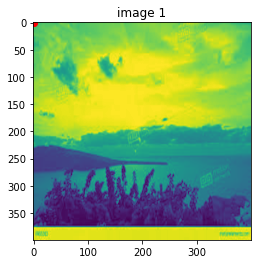

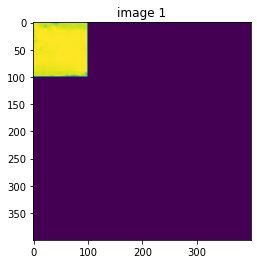

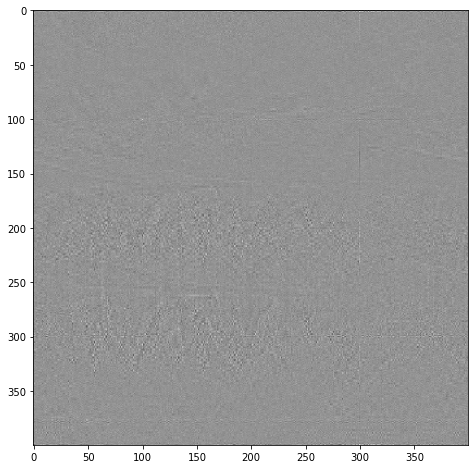

In [11]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

#Get two images with snippet at different locations
im1 = np.mean(img1, axis=-1) #naive colour flattening  

im2 = np.zeros_like(im1)    
im2[:100,:100] = im1[100:200, 100:200]

corrimg = phase_correlation(im1, im2)
r,c = np.unravel_index(corrimg.argmax(), corrimg.shape)

plt.title("image 1")
plt.imshow(im1)
plt.plot([c],[r],'ro')
plt.show()

plt.title("image 1")
plt.imshow(im2)
plt.show()

plt.figure(figsize=[8,8])
plt.imshow(corrimg, cmap='gray')

plt.show()

# Qustion 2

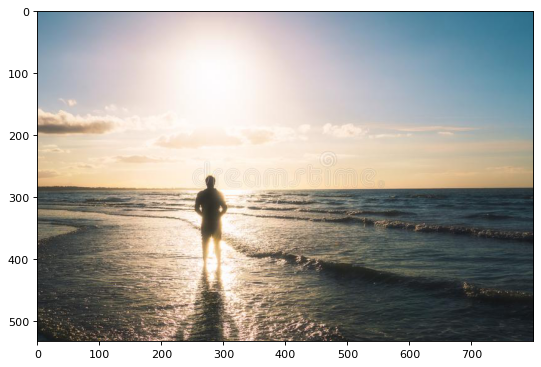

In [12]:
# oragenal image
img1 = Image.open('seashore-facing-sun.jpg')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img1, cmap='gray');

In [13]:
import random
import cv2
 
def add_noise(img):
    """
    this function will take an image and return an image as a grayscale with noise"""
    row , col = img.shape
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
    return img

In [14]:
# # read the image as a cv2 
# img = cv2.imread('seashore-facing-sun.jpg',
#                  cv2.IMREAD_GRAYSCALE)
 
# #Storing the image
# cv2.imwrite('salt-and-pepper-seashore-facing-sun.jpg',
#             add_noise(img))

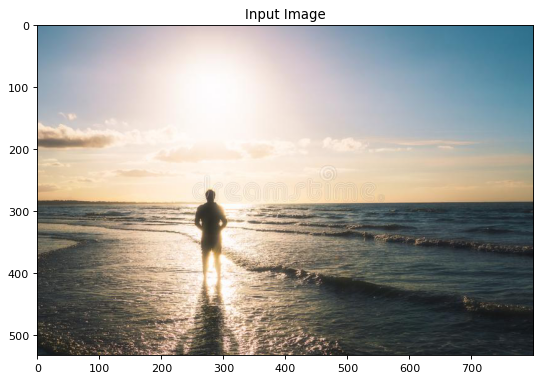

In [15]:
img = cv2.imread('salt-and-pepper-seashore-facing-sun.jpg',0)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img1, cmap='gray')
plt.title('Input Image');

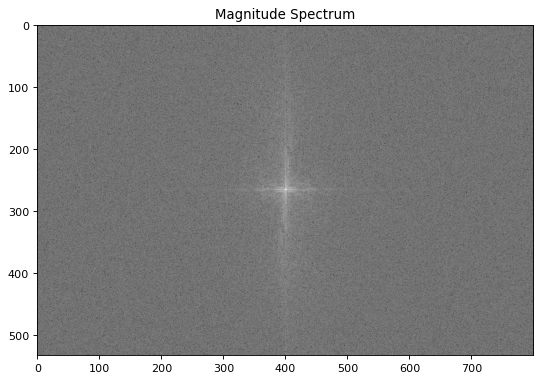

In [16]:
fft_image1 = np.fft.fftshift(np.fft.fft2(img))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(fft_image1)), cmap='gray')
plt.title('Magnitude Spectrum');

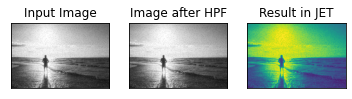

In [17]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
# fft_image1[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fft_image1)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()